In [1]:
import pandas as pd
import numpy as np
import time
import normet as nm
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig

In [2]:
df1=pd.read_csv(r'data/MY1_data.csv',parse_dates=['date'],index_col='date')

In [3]:
df1

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


# AutoML-based weather normalisation

In [4]:
df1a=nm.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [5]:
model_config = {
        'time_budget': 90,                     # Total running time in seconds
        'metric': 'r2',                        # Primary metric for regression, 'mae', 'mse', 'r2', 'mape',...
        'estimator_list': ["lgbm"],            # List of ML learners: "lgbm", "rf", "xgboost", "extra_tree", "xgb_limitdepth"
    }

In [6]:
model1=nm.train_model(df1a,variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],model_config =model_config );

2024-09-24 16:20:23 : Training AutoML...
2024-09-24 16:21:57 : Best model is lgbm with best model parameters of {'n_estimators': 4779, 'num_leaves': 37, 'min_child_samples': 13, 'learning_rate': 0.05353325544814332, 'log_max_bin': 10, 'colsample_bytree': 0.7006661480744041, 'reg_alpha': 3.4963871783049667, 'reg_lambda': 0.12148015741620988}


In [7]:
model1

AutoML(append_log=False, auto_augment=True, custom_hp={},
       cv_score_agg_func=None, early_stop=False, ensemble=False,
       estimator_list='auto', eval_method='auto', fit_kwargs_by_estimator={},
       force_cancel=False, free_mem_ratio=0, hpo_method='auto',
       keep_search_state=False, learner_selector='sample', log_file_name='',
       log_training_metric=False, log_type='better', max_iter=None,
       mem_thres=4294967296, metric='auto', metric_constraints=[],
       min_sample_size=10000, mlflow_logging=True, model_history=False,
       n_concurrent_trials=1, n_jobs=-1, n_splits=5, pred_time_limit=inf,
       preserve_checkpoint=True, retrain_full=True, ...)

In [8]:
best_model = model1.best_estimator
best_config = model1.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)
model1.best_result

Best model: lgbm
Best model parameters: {'n_estimators': 4779, 'num_leaves': 37, 'min_child_samples': 13, 'learning_rate': 0.05353325544814332, 'log_max_bin': 10, 'colsample_bytree': 0.7006661480744041, 'reg_alpha': 3.4963871783049667, 'reg_lambda': 0.12148015741620988}


{'pred_time': 1.9110346438994467e-05,
 'wall_clock_time': 90.33755874633789,
 'metric_for_logging': {'pred_time': 1.9110346438994467e-05},
 'val_loss': 0.12917426813136582,
 'training_iteration': 1,
 'config': {'n_estimators': 4779,
  'num_leaves': 37,
  'min_child_samples': 13,
  'learning_rate': 0.05353325544814332,
  'log_max_bin': 10,
  'colsample_bytree': 0.7006661480744041,
  'reg_alpha': 3.4963871783049667,
  'reg_lambda': 0.12148015741620988},
 'config/n_estimators': 4779,
 'config/num_leaves': 37,
 'config/min_child_samples': 13,
 'config/learning_rate': 0.05353325544814332,
 'config/log_max_bin': 10,
 'config/colsample_bytree': 0.7006661480744041,
 'config/reg_alpha': 3.4963871783049667,
 'config/reg_lambda': 0.12148015741620988,
 'experiment_tag': 'exp',
 'time_total_s': 9.342859029769897}

In [9]:
model1.feature_importances_

array([ 993, 6549, 6934, 5345, 5295, 6633, 6315, 4237, 6126, 3377, 6176,
       4652, 1062, 3878], dtype=int32)

In [10]:
model1.feature_names_in_

['weekday',
 'u10',
 'v10',
 'd2m',
 't2m',
 'blh',
 'sp',
 'ssrd',
 'tcc',
 'tp',
 'rh2m',
 'date_unix',
 'day_julian',
 'hour']

In [11]:
model_config = {
        'time_budget': 90,
        #'max_models': 10,              # Maximum number of models to train
        #'max_mem_size': '12g',         # Maximum memory size for H2O
        'estimator_list': ['GBM'],     # List of algorithms to use in AutoML
    }

In [12]:
model2=nm.train_model(df1a,automl_pkg='h2o',variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],model_config=model_config);

H2O is not running. Starting H2O...
Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 59 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_n94921cs_5qrqdn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.572 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,1
H2O_cluster_status:,"locked, healthy"


2024-09-24 16:21:58: Training AutoML...
2024-09-24 16:22:42: Best model obtained! - GBM_grid_1_AutoML_4_20240924_162158_model_2


In [13]:
model2

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_4_20240924_162158_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    69                 69                          1.18928e+06            13           13           13            625           1942          1369.28

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.011242541344013361
RMSE: 0.10603085090676846
MAE: 0.07893400538333294
RMSLE: NaN
Mean Residual Deviance: 0.011242541344013361

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 8.126360199772725
RMSE: 2.850677147586644
MAE: 1.9222905950632483
RMSLE: NaN
Mean Residual Deviance: 8.126360199772725

Cross-Validation Metrics Summary: 
                        mean     sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan      0           nan           nan           nan           nan           nan
loglikelihood           nan      0           nan           nan           nan           nan           nan
mae                     1.92229  0.0324555   1.90847       1.90528       1.88886       1.97101       1.93784
mean_residual_deviance  8.12636  0.654864    8.18245       7.17496       7.84598       8.85087       8.57754
mse                     8.12636  0.654864    8.18245       7.17496       7.84598       8.85087       8.57754
r2                      0.87931  0.00956279  0.880543      0.890212      0.8867        0.869232      0.869863
residual_deviance       8.12636  0.654864    8.18245       7.17496       7.84598       8.85087       8.57754
rmse                    2.84879  0.115874    2.8605        2.67861       2.80107       2.97504       2.92874
rmsle                   nan      0           nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-09-24 16:22:28  7.661 sec   0                  8.20623          5.47466         67.3423
    2024-09-24 16:22:28  7.723 sec   5                  5.04424          3.41518         25.4444
    2024-09-24 16:22:28  7.779 sec   10                 3.19141          2.20531         10.1851
    2024-09-24 16:22:28  7.835 sec   15                 2.01626          1.43587         4.06532
    2024-09-24 16:22:28  7.892 sec   20                 1.32587          0.976539        1.75794
    2024-09-24 16:22:28  7.957 sec   25                 0.880116         0.667526        0.774605
    2024-09-24 16:22:28  8.014 sec   30                 0.621349         0.479635        0.386075
    2024-09-24 16:22:28  8.067 sec   35                 0.4578           0.35725         0.209581
    2024-09-24 16:22:28  8.132 sec   40                 0.33798          0.264745        0.114231
    2024-09-24 16:22:28  8.191 sec   45                 0.264846         0.20514         0.0701433
    2024-09-24 16:22:28  8.251 sec   50                 0.20695          0.159539        0.0428284
    2024-09-24 16:22:28  8.305 sec   55                 0.166372         0.127531        0.0276798
    2024-09-24 16:22:28  8.354 sec   60                 0.139759         0.10641         0.0195326
    2024-09-24 16:22:28  8.408 sec   65                 0.116726         0.0878304       0.013625
    2024-09-24 16:22:29  8.495 sec   69                 0.106031         0.078934        0.0112425

Variable Importances: 
variable    relative_importance  

In [14]:
?nm.train_model

Signature:
nm.train_model(
    df,
    value='value',
    automl_pkg='flaml',
    variables=None,
    model_config=None,
    seed=7654321,
    n_cores=None,
    verbose=True,
)
Docstring:
Trains a machine learning model using either FLAML or H2O AutoML.

Parameters:
    df (pandas.DataFrame): Input dataset to train the model.
    value (str): The name of the target column in the dataset. Default is "value".
    automl_pkg (str): The AutoML package to use ("flaml" or "h2o").
    variables (list, optional): List of feature variables to use for training.
    model_config (dict, optional): Configuration settings for the model training.
    seed (int, optional): Random seed for reproducibility. Default is 7654321.
    n_cores (int, optional): Number of CPU cores to use for training. Default is None.
    verbose (bool, optional): Whether to print detailed logs. Default is True.

Returns:
    model: Trained machine learning model with a custom attribute `_model_type` indicating the package us

In [15]:
mod_stats1=nm.modStats(df1a,model1)

In [16]:
mod_stats1

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,4780,0.987238,-0.000007,0.268328,-7.437997e-07,0.029447,0.351283,0.999110,***,0.950987,0.975494,0.998222,training
1,1593,0.907721,0.090223,1.920277,9.806910e-03,0.208727,2.699133,0.940890,***,0.650259,0.825129,0.885274,testing
2,6373,0.967362,0.022547,0.681250,2.468418e-03,0.074582,1.383329,0.985535,***,0.875668,0.937834,0.971279,all


In [17]:
mod_stats2=nm.modStats(df1a,model2)

In [18]:
mod_stats2

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,4780,0.994142,2.145110e-08,0.078934,2.354070e-09,0.008662,0.106031,0.999923,***,0.985582,0.992791,0.999846,training
1,1593,0.901444,1.458128e-01,1.952102,1.584932e-02,0.212186,2.753047,0.939557,***,0.644462,0.822231,0.882767,testing
2,6373,0.970971,3.644749e-02,0.547153,3.990205e-03,0.059901,1.379475,0.985645,***,0.900142,0.950071,0.971496,all


In [19]:
start_time = time.time()
df_dew1=nm.normalise(df1a,model1, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=1000,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-09-24 16:22:45: Normalising the dataset in parallel.
2024-09-24 16:22:47: Predicting using trained model in batches.
2024-09-24 16:25:07: Aggregating 1000 predictions...
Execution time: 142.41 seconds


In [20]:
start_time = time.time()
df_dew2=nm.normalise(df1a,model2, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=1000,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-09-24 16:25:08: Normalising the dataset in parallel.
2024-09-24 16:25:09: Predicting using trained model in batches.
2024-09-24 16:29:04: Aggregating 1000 predictions...
Execution time: 236.45 seconds


<Axes: xlabel='date'>

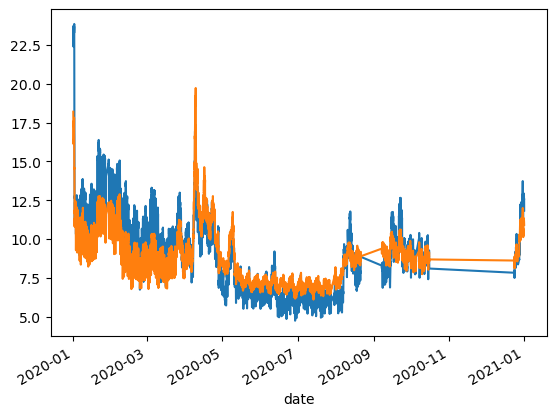

In [21]:
fig,ax=plt.subplots()
df_dew1['normalised'].plot()
df_dew2['normalised'].plot()

In [22]:
start_time = time.time()
df_dew3=nm.normalise(df1a,model1, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=1000,aggregate=False)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-09-24 16:29:05: Normalising the dataset in parallel.
2024-09-24 16:29:06: Predicting using trained model in batches.
Execution time: 143.14 seconds


In [23]:
df_dew3.head()

,date,observed,normalised,seed
0,2020-01-01 00:00:00,58.1,17.221536,979812
1,2020-01-01 01:00:00,43.2,32.937436,979812
2,2020-01-01 02:00:00,43.0,24.423807,979812
3,2020-01-01 03:00:00,42.8,23.372347,979812
4,2020-01-01 04:00:00,36.8,26.478917,979812


In [24]:
weather_df=df1.reset_index().iloc[0:100][['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m']]

In [25]:
weather_df.head()

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m
0,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130
1,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877
2,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560
3,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363
4,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878


In [26]:
start_time = time.time()
df_dew2=nm.normalise(df1a, model1, weather_df=weather_df,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-09-24 16:31:28: Normalising the dataset in parallel.
2024-09-24 16:31:28: Predicting using trained model in batches.
2024-09-24 16:32:10: Aggregating 300 predictions...
Execution time: 42.37 seconds


<Axes: xlabel='date'>

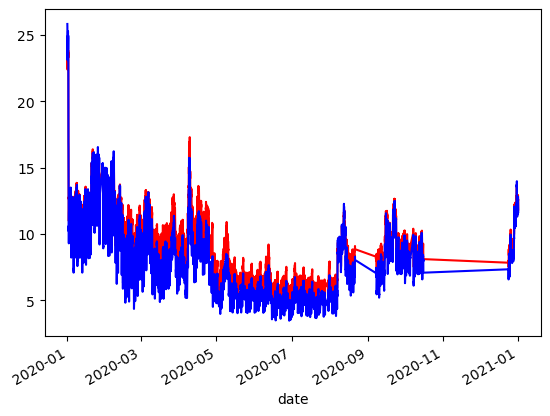

In [27]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')

In [28]:
model_config={
    'time_budget': 60,  # Total running time in seconds
    'metric': 'r2', #
}

In [29]:
df1a.columns

Index(['rowid', 'd2m', 'blh', 'ssrd', 't2m', 'v10', 'u10', 'sp', 'tp', 'tcc',
       'rh2m', 'date', 'value', 'date_unix', 'day_julian', 'weekday', 'hour',
       'set'],
      dtype='object')

In [30]:
df_dew, mod_stats=nm.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-09-24 16:32:10 : Training AutoML...
2024-09-24 16:33:08 : Best model is lgbm with best model parameters of {'n_estimators': 527, 'num_leaves': 57, 'min_child_samples': 19, 'learning_rate': 0.10029209493914669, 'log_max_bin': 10, 'colsample_bytree': 0.777659907533841, 'reg_alpha': 5.054157418960246, 'reg_lambda': 0.023089272254781048}
2024-09-24 16:33:09: Normalising the dataset in parallel.
2024-09-24 16:33:09: Predicting using trained model in batches.
2024-09-24 16:33:14: Aggregating 100 predictions...


In [31]:
df_dew, mod_stats=nm.do_all(df1a,model1,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-09-24 16:33:15: Normalising the dataset in parallel.
2024-09-24 16:33:15: Predicting using trained model in batches.
2024-09-24 16:33:28: Aggregating 100 predictions...


In [32]:
#Resampling from given dataset
df_dew, mod_stats=nm.do_all(df1a,model1,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],weather_df=weather_df,model_config=model_config,n_samples=100)

2024-09-24 16:33:29: Normalising the dataset in parallel.
2024-09-24 16:33:29: Predicting using trained model in batches.
2024-09-24 16:33:42: Aggregating 100 predictions...


In [33]:
df_dew, mod_stats=nm.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=100,n_models=5)

2024-09-24 16:35:15 : Progress: 20.00% (Model 1/5)... ETA: 6.22 minutes
2024-09-24 16:37:17 : Progress: 40.00% (Model 2/5)... ETA: 5.37 minutes
2024-09-24 16:39:04 : Progress: 60.00% (Model 3/5)... ETA: 3.58 minutes
2024-09-24 16:41:10 : Progress: 80.00% (Model 4/5)... ETA: 1.87 minutes
2024-09-24 16:42:49 : Progress: 100.00% (Model 5/5)... ETA: 0.00 seconds


In [34]:
df_dew.head()

,observed,normalised_979812,normalised_378829,normalised_120727,normalised_541475,normalised_488292,mean,std,median,lower_bound,upper_bound,weighted
date,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,30.252205,26.007282,21.472511,13.609010,13.521217,20.972445,6.655142,21.472511,13.529996,29.827713,20.220786
2020-01-01 01:00:00,43.2,30.718119,22.379913,22.043467,11.979618,14.756184,20.375460,6.570192,22.043467,12.257275,29.884298,18.638353
2020-01-01 02:00:00,43.0,30.120009,21.627895,20.220487,13.131916,14.394936,19.899048,6.060521,20.220487,13.258218,29.270797,18.202305
2020-01-01 03:00:00,42.8,28.591281,21.836566,22.887696,11.813100,12.544112,19.534551,6.435126,21.836566,11.886201,28.020922,18.432641
2020-01-01 04:00:00,36.8,30.390922,21.896232,21.653471,12.113235,12.944652,19.799702,6.724275,21.653471,12.196376,29.541453,18.257228


# Time series decomposition

In [35]:
df_dewca, mod_stats=nm.decom_emi(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random', fraction=0.75, n_samples=300)

2024-09-24 16:42:49 : Training AutoML...
2024-09-24 16:44:15 : Best model is lgbm with best model parameters of {'n_estimators': 4779, 'num_leaves': 37, 'min_child_samples': 13, 'learning_rate': 0.05353325544814332, 'log_max_bin': 10, 'colsample_bytree': 0.7006661480744041, 'reg_alpha': 3.4963871783049667, 'reg_lambda': 0.12148015741620988}
2024-09-24 16:44:15 : Subtracting base...
2024-09-24 16:44:59 : Subtracting date_unix... ETA: 2.93 minutes
2024-09-24 16:45:41 : Subtracting day_julian... ETA: 2.16 minutes
2024-09-24 16:46:27 : Subtracting weekday... ETA: 1.46 minutes
2024-09-24 16:47:12 : Subtracting hour... ETA: 44.25 seconds


In [36]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.834232,18.762883,3.617389,0.991752,0.271323,24.320077,0.676729
2020-01-01 01:00:00,43.2,9.211363,19.549169,3.381027,0.795226,0.420953,24.200235,0.053860
2020-01-01 02:00:00,43.0,8.740657,18.760258,4.192777,0.800782,-0.187559,23.149413,-0.416846
2020-01-01 03:00:00,42.8,8.869214,18.804496,3.959970,0.529601,-0.208110,22.797669,-0.288289
2020-01-01 04:00:00,36.8,8.184215,19.394484,3.038679,0.761000,0.107604,22.328479,-0.973288
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.621910,12.759990,0.336607,-0.046839,0.406496,12.920661,-0.535593
2020-12-31 20:00:00,11.0,8.749583,12.430059,0.528524,-0.321991,0.086078,12.314750,-0.407920
2020-12-31 21:00:00,15.3,8.957951,12.361814,0.078852,-0.219580,0.304223,12.325758,-0.199552


In [37]:
df_dewca, mod_stats=nm.decom_emi(df1a, model=model1,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-09-24 16:47:57 : Subtracting base...
2024-09-24 16:48:43 : Subtracting date_unix... ETA: 3.06 minutes
2024-09-24 16:49:30 : Subtracting day_julian... ETA: 2.31 minutes
2024-09-24 16:50:13 : Subtracting weekday... ETA: 1.51 minutes
2024-09-24 16:50:54 : Subtracting hour... ETA: 44.25 seconds


In [38]:
df_dewcb, mod_stats=nm.decom_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-09-24 16:51:38 : Training AutoML...
2024-09-24 16:53:13 : Best model is lgbm with best model parameters of {'n_estimators': 4779, 'num_leaves': 37, 'min_child_samples': 13, 'learning_rate': 0.05353325544814332, 'log_max_bin': 10, 'colsample_bytree': 0.7006661480744041, 'reg_alpha': 3.4963871783049667, 'reg_lambda': 0.12148015741620988}
2024-09-24 16:53:14 : Subtracting deweathered...
2024-09-24 16:53:59 : Subtracting v10... ETA: 7.63 minutes
2024-09-24 16:54:42 : Subtracting blh... ETA: 6.60 minutes
2024-09-24 16:55:24 : Subtracting u10... ETA: 5.79 minutes
2024-09-24 16:56:05 : Subtracting sp... ETA: 4.98 minutes
2024-09-24 16:56:45 : Subtracting rh2m... ETA: 4.22 minutes
2024-09-24 16:57:25 : Subtracting tcc... ETA: 3.49 minutes
2024-09-24 16:58:05 : Subtracting d2m... ETA: 2.78 minutes
2024-09-24 16:58:44 : Subtracting t2m... ETA: 2.07 minutes
2024-09-24 16:59:24 : Subtracting ssrd... ETA: 1.37 minutes
2024-09-24 17:00:06 : Subtracting tp... ETA: 41.25 seconds


In [39]:
df_dewcb, mod_stats=nm.decom_met(df1a, model=model1, feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-09-24 17:00:49 : Subtracting deweathered...
2024-09-24 17:01:32 : Subtracting v10... ETA: 7.12 minutes
2024-09-24 17:02:15 : Subtracting blh... ETA: 6.50 minutes
2024-09-24 17:03:01 : Subtracting u10... ETA: 5.86 minutes
2024-09-24 17:03:45 : Subtracting sp... ETA: 5.13 minutes
2024-09-24 17:04:29 : Subtracting rh2m... ETA: 4.40 minutes
2024-09-24 17:05:11 : Subtracting tcc... ETA: 3.64 minutes
2024-09-24 17:05:53 : Subtracting d2m... ETA: 2.89 minutes
2024-09-24 17:06:38 : Subtracting t2m... ETA: 2.18 minutes
2024-09-24 17:07:17 : Subtracting ssrd... ETA: 1.44 minutes
2024-09-24 17:07:57 : Subtracting tp... ETA: 42.86 seconds


In [40]:
df_dewcb

,observed,deweathered,v10,blh,u10,sp,rh2m,tcc,d2m,t2m,ssrd,tp,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,23.775707,2.803204,2.690817,10.533843,14.459222,6.452000,5.053862,4.216987,5.003190,4.792167,5.521003,1.596199
2020-01-01 01:00:00,43.2,23.712904,1.546627,4.394804,11.799731,10.566854,1.769647,1.297532,1.966014,2.295684,1.542771,1.862642,-0.930420
2020-01-01 02:00:00,43.0,23.308907,1.740158,6.840758,12.729884,8.339736,1.449420,1.877752,2.321789,0.919309,-0.113854,2.106147,-0.392609
2020-01-01 03:00:00,42.8,21.808085,2.402217,10.777716,12.743709,5.307592,1.729576,2.229663,2.012881,0.785298,0.305861,1.625649,0.265997
2020-01-01 04:00:00,36.8,22.173301,1.698096,8.612109,9.510499,3.318336,1.694841,2.583169,2.313238,0.499432,-0.465211,1.463167,-1.849514
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,12.869070,0.146833,-0.498743,-0.443972,0.866222,0.683517,-0.338941,-0.219422,-0.602156,-1.466656,-0.560928,-0.034524
2020-12-31 20:00:00,11.0,12.018398,0.320049,-0.056764,-0.113305,0.966535,0.720601,-0.261063,-0.324155,-1.152303,-1.581597,-0.370613,-0.144190
2020-12-31 21:00:00,15.3,12.231738,0.397497,-0.242102,-0.911311,0.589118,0.786209,-0.246796,-0.040521,-0.713239,-1.326826,-0.321144,4.002425


In [41]:
df_dewca, mod_stats=nm.decom_emi(df1a, model=model1,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-09-24 17:08:35 : Subtracting base...
2024-09-24 17:09:22 : Subtracting date_unix... ETA: 3.10 minutes
2024-09-24 17:10:09 : Subtracting day_julian... ETA: 2.36 minutes
2024-09-24 17:10:55 : Subtracting weekday... ETA: 1.56 minutes
2024-09-24 17:11:40 : Subtracting hour... ETA: 46.26 seconds


In [42]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.636890,18.471507,3.981692,1.373361,-0.159863,24.146201,0.479505
2020-01-01 01:00:00,43.2,9.560233,18.945920,3.962606,0.950994,-0.031199,24.231168,0.402847
2020-01-01 02:00:00,43.0,9.457613,18.446638,3.478760,1.149818,-0.735301,22.640142,0.300227
2020-01-01 03:00:00,42.8,9.553435,17.988441,4.450814,0.201102,-0.431935,22.604472,0.396050
2020-01-01 04:00:00,36.8,8.259178,18.887683,3.579915,1.171948,-0.676739,22.064599,-0.898208
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.791405,12.619534,0.570769,-0.282182,0.277319,12.819460,-0.365980
2020-12-31 20:00:00,11.0,8.768305,12.125637,0.483223,0.000221,-0.067327,12.152672,-0.389080
2020-12-31 21:00:00,15.3,8.492577,12.543496,0.251146,0.147919,-0.081575,12.196178,-0.664809


# Rolling weather normalisation

In [43]:
df_dewc1, mod_stats=nm.rolling(df1a, model1,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rolling_every=7)

2024-09-24 17:12:28: Rolling window 0 from 2020-01-01 to 2020-01-14
2024-09-24 17:12:37: Rolling window 10 from 2020-03-03 to 2020-03-16
2024-09-24 17:12:47: Rolling window 20 from 2020-05-02 to 2020-05-15
2024-09-24 17:12:55: Rolling window 30 from 2020-07-01 to 2020-07-14
2024-09-24 17:13:02: Rolling window 40 from 2020-09-17 to 2020-09-30


In [44]:
df_dewc1.head()

,observed,rolling_0,rolling_1,rolling_2,rolling_3,rolling_4,rolling_5,rolling_6,rolling_7,rolling_8,...,rolling_35,rolling_36,rolling_37,rolling_38,rolling_39,rolling_40,rolling_41,rolling_42,rolling_43,rolling_44
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,20.207316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,20.131948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,19.247751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,19.310005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,20.072632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

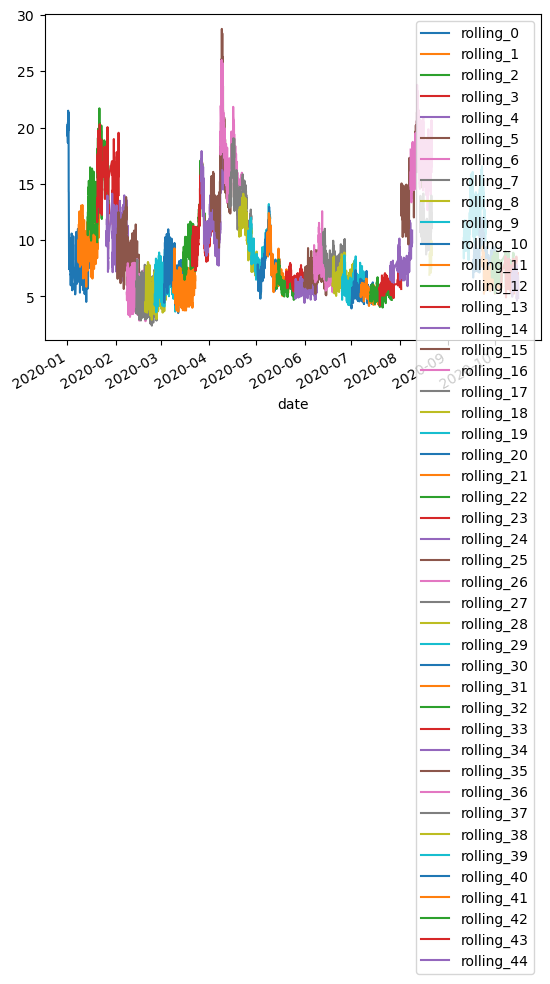

In [45]:
df_dewc1.iloc[:,1:].plot()

# Partial Dependence Plots

In [46]:
df1a=nm.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [47]:
df1a

,rowid,d2m,blh,ssrd,t2m,v10,u10,sp,tp,tcc,rh2m,date,value,date_unix,day_julian,weekday,hour,set
0,0,277.183465,384.209053,-1.164153e-10,278.394725,1.545010,-2.720528,102252.303312,0.000008,0.650958,91.884130,2020-01-01 00:00:00,58.1,1.577837e+09,1,3,0,training
1,1,276.695430,353.220263,-1.164153e-10,277.772899,1.282742,-2.308789,102211.168636,0.000002,0.603699,92.715877,2020-01-01 01:00:00,43.2,1.577840e+09,1,3,1,training
2,2,276.505662,255.911846,-1.164153e-10,277.463419,0.758730,-2.216471,102174.855967,0.000005,0.710378,93.485560,2020-01-01 02:00:00,43.0,1.577844e+09,1,3,2,testing
3,3,276.412816,191.375560,-1.164153e-10,277.305813,0.509013,-1.928623,102166.786485,0.000005,0.837765,93.906363,2020-01-01 03:00:00,42.8,1.577848e+09,1,3,3,training
4,4,276.553051,151.780210,-1.164153e-10,277.478941,0.607069,-1.700043,102142.578039,0.000003,0.819103,93.696878,2020-01-01 04:00:00,36.8,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,272.197565,476.945688,-5.820766e-11,273.557442,-1.945195,1.380939,99902.506413,0.000000,0.918149,90.582979,2020-12-31 19:00:00,11.7,1.609441e+09,366,4,19,training
6369,6369,272.171041,486.665851,-5.820766e-11,273.629146,-2.102732,0.987925,99947.625909,0.000000,0.839639,89.939908,2020-12-31 20:00:00,11.0,1.609445e+09,366,4,20,training
6370,6370,272.087408,489.355002,-5.820766e-11,273.470592,-1.933668,0.681543,100000.215520,0.000000,0.739354,90.422188,2020-12-31 21:00:00,15.3,1.609448e+09,366,4,21,testing
6371,6371,272.235319,40.714872,-5.820766e-11,272.926062,-0.583816,1.020793,100042.844978,0.000000,0.643753,95.088677,2020-12-31 22:00:00,17.1,1.609452e+09,366,4,22,training


In [49]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=nm.pdp(df1a,model1,var_list=['blh'])

In [50]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,blh,73.415911,15.742461,8.358786
1,blh,88.917320,15.359839,8.271418
2,blh,104.418730,14.966788,8.354652
3,blh,119.920140,15.582338,8.428540
4,blh,135.421549,13.699515,7.471944
...,...,...,...,...
95,blh,1546.049822,6.940856,4.955734
96,blh,1561.551231,6.955089,4.957737
97,blh,1577.052641,6.960697,4.952725
98,blh,1592.554051,7.132266,4.943666


In [51]:
pdp_value=nm.pdp(df1a,model1,var_list=['blh','t2m'])

In [52]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,blh,73.415911,15.742461,8.358786
1,blh,88.917320,15.359839,8.271418
2,blh,104.418730,14.966788,8.354652
3,blh,119.920140,15.582338,8.428540
4,blh,135.421549,13.699515,7.471944
...,...,...,...,...
195,t2m,294.518468,10.544835,7.865555
196,t2m,294.715875,10.532480,7.856032
197,t2m,294.913281,10.565610,7.847180
198,t2m,295.110688,10.527926,7.840150


In [53]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=nm.pdp(df1a,model1)

In [54]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,weekday,1.0,8.808568,7.348096
1,weekday,2.0,8.975131,7.397715
2,weekday,3.0,9.519126,7.803357
3,weekday,4.0,9.178989,7.852847
4,weekday,5.0,9.756207,7.741670
...,...,...,...,...
1226,hour,19.0,9.648269,7.468077
1227,hour,20.0,9.583308,7.474737
1228,hour,21.0,9.275591,7.467640
1229,hour,22.0,9.089483,7.493595
